Team members:
Mahathir Maxim - mhm180000
Edwin Betancourt - exb150030


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

%matplotlib inline

   No  X1 transaction date  ...  X6 longitude  Y house price of unit area
0   1             2012.917  ...     121.54024                        37.9
1   2             2012.917  ...     121.53951                        42.2
2   3             2013.583  ...     121.54391                        47.3
3   4             2013.500  ...     121.54391                        54.8
4   5             2012.833  ...     121.54245                        43.1

[5 rows x 8 columns]
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64
                                          No  ...  Y house price of unit area
No                                      1.00  ...                       -0.03
X1 transactio

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


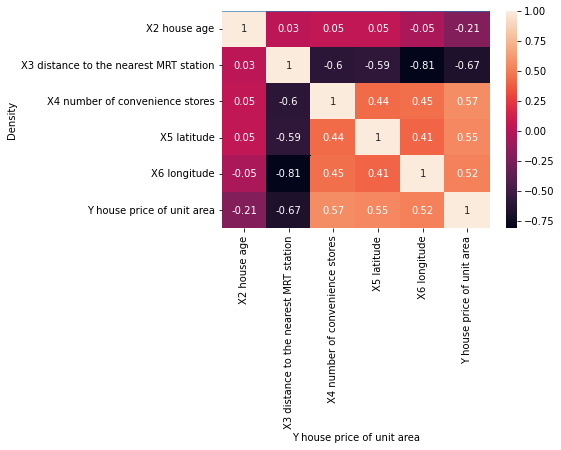

In [ ]:
def main():

    dataset = pd.read_csv("https://cs4375fall21.s3.amazonaws.com/RealEstateData.csv")
    print(dataset.head());
    print(dataset.isnull().sum())
    correlation= dataset.corr().round(2)
    print(correlation)
    #sns.heatmap(data=correlation, annot=True)
    dataset.drop('No', axis=1, inplace=True)
    dataset.drop('X1 transaction date', axis=1, inplace=True)
    correlation= dataset.corr().round(2)
    sns.heatmap(data=correlation, annot=True)

    X = pd.DataFrame(np.c_[ dataset['X2 house age'], dataset['X3 distance to the nearest MRT station'], dataset['X4 number of convenience stores'], dataset['X5 latitude'], dataset['X6 longitude']], 
                 columns = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude' ])
    Y = dataset['Y house price of unit area']

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
    print(X_train.shape)
    print(X_test.shape)
    print(Y_train.shape)
    print(Y_test.shape)



    lin_model = LinearRegression(normalize=True)
    #lin_model= SGDRegressor()
    #lin_model= SGDRegressor(alpha=0.001, max_iter=2000, learning_rate='constant', eta0=0.000001)
    lin_model.fit(X_train, Y_train)



    print(lin_model.coef_)
    print(lin_model.intercept_)

    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    print(rmse)

    r2 = r2_score(Y_train, y_train_predict)

    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")
    
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(dataset['Y house price of unit area'], bins=30)
    plt.show()

if __name__ == "__main__" : 
      
    main()
